In [11]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [135]:
def get_graph_for_ticker(ticker):
    data = yf.download(tickers=['^GSPC', ticker], period='1y')['Adj Close']
    data = data.pct_change(axis=0).dropna()

    rf = 0.015 / 365

    market = data['^GSPC'] - rf
    stocks = data.drop(columns='^GSPC') - rf

    plt.style.use('default')
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)


    beta, alpha = np.polyfit(market, stocks[ticker], 1)
    plt.scatter(market, stocks[ticker], color='lightseagreen', marker='.')
    plt.plot(market, beta * market + alpha, color='red', label=f'$\\alpha$ = {alpha+rf:.2e}, $\\beta$ = {beta:.2f}')



    plt.tick_params(labelleft=False, labelbottom=False, tick1On=False)
    plt.xlabel('S&P500 excess returns')
    plt.ylabel(f'{ticker} excess returns')
    plt.legend(loc='upper left', prop={'size': 16})

[*********************100%***********************]  2 of 2 completed


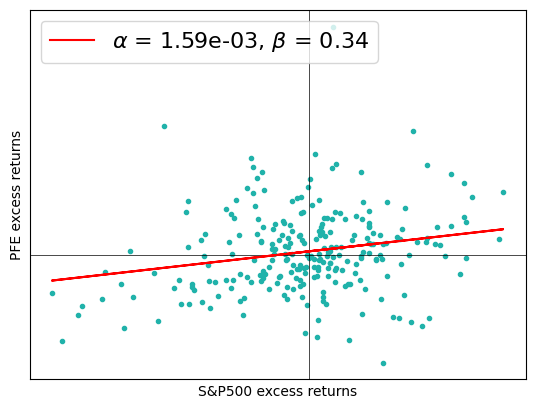

In [136]:
get_graph_for_ticker('PFE')

[*********************100%***********************]  2 of 2 completed


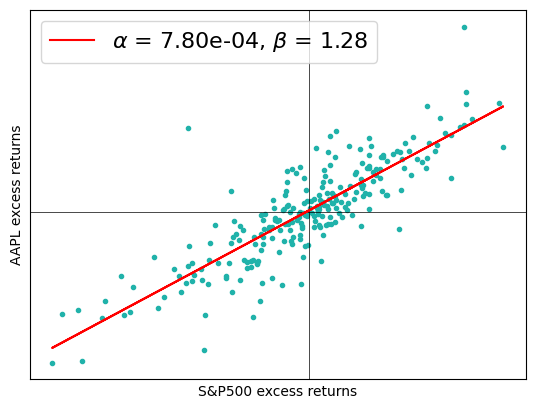

In [137]:
get_graph_for_ticker('AAPL')